In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from functools import reduce
import numpy as np

In [2]:
# Load datasets
surface_temp_df = pd.read_csv("C:/Users/ATAISH NEHRA/Downloads/Top 30 dataset/surface_temp_clean.csv")
sea_levels_df = pd.read_csv("C:/Users/ATAISH NEHRA/Downloads/Top 30 dataset/country_sea_levels.csv")
climate_disasters_df = pd.read_csv("C:/Users/ATAISH NEHRA/Downloads/Top 30 dataset/climate_disasters_clean.csv")
land_cover_df = pd.read_csv("C:/Users/ATAISH NEHRA/Downloads/Top 30 dataset/Land Cover Accounts Top 30 clean.csv")
forest_carbon_df = pd.read_csv("C:/Users/ATAISH NEHRA/Downloads/Top 30 dataset/Forest and Carbon Top 30 clean imputed.csv")

In [3]:
# Define filtering function
def filter_data(df, start_year=1992, end_year=2020, exclude_world=True):
    df = df[(df['Year'] >= start_year) & (df['Year'] <= end_year)]
    if exclude_world and 'Country' in df.columns:
        df = df[df['Country'] != 'World']
    return df

In [4]:
# Apply filtering
surface_temp_filtered = filter_data(surface_temp_df)
sea_levels_filtered = filter_data(sea_levels_df)
climate_disasters_filtered = filter_data(climate_disasters_df)
land_cover_filtered = filter_data(land_cover_df)
forest_carbon_filtered = filter_data(forest_carbon_df)

In [5]:
# Merge datasets
dfs = [surface_temp_filtered, sea_levels_filtered, climate_disasters_filtered, land_cover_filtered, forest_carbon_filtered]
final_df = reduce(lambda left, right: pd.merge(left, right, on=['Country', 'Year'], how='outer'), dfs)

In [6]:
# Handle missing values by filling with the mean
final_df_filled = final_df.fillna(final_df.mean(numeric_only=True))

# Create a new feature as an example of feature engineering
final_df_filled['Total Climate Impact'] = final_df_filled[['Temperature', 'Value']].mean(axis=1)

In [7]:
# Prepare data for modeling
X = final_df_filled.drop(columns=['Country', 'Year', 'TOTAL', 'Total Climate Impact'])
y = final_df_filled['TOTAL']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Ridge regression model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# Predict on the test set
y_pred = ridge_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 1.3414155955955513e-06
R^2 Score: 0.9999998123920476


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

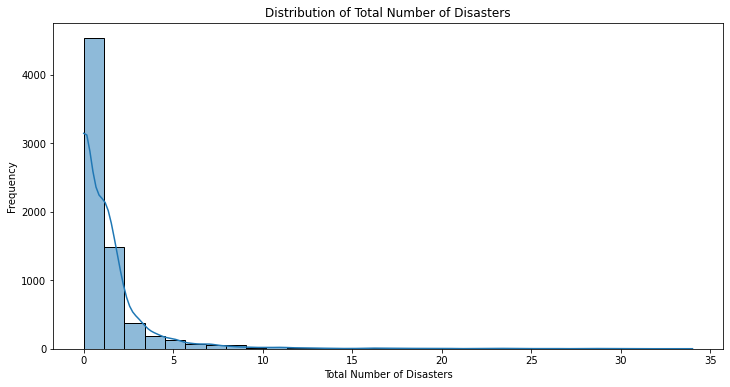

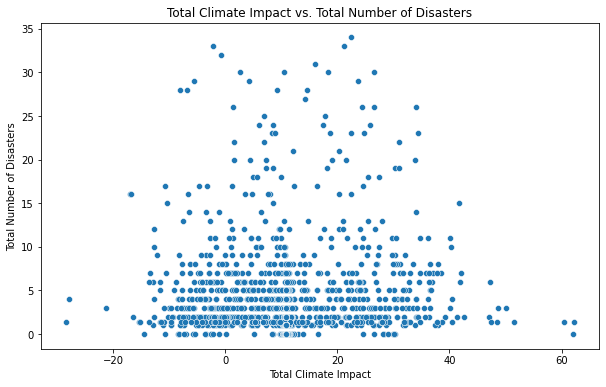

(1.3414155955955513e-06, 0.9999998123920476)

In [14]:
# Conducting EDA on the 'TOTAL' variable to understand its distribution and relationship with features
plt.figure(figsize=(12, 6))
sns.histplot(y, bins=30, kde=True)
plt.title('Distribution of Total Number of Disasters')
plt.xlabel('Total Number of Disasters')
plt.ylabel('Frequency')
plt.show()

# Visualizing the relationship between 'Total Climate Impact' and 'TOTAL'
plt.figure(figsize=(10, 6))
sns.scatterplot(x=final_df_filled['Total Climate Impact'], y=final_df_filled['TOTAL'])
plt.title('Total Climate Impact vs. Total Number of Disasters')
plt.xlabel('Total Climate Impact')
plt.ylabel('Total Number of Disasters')
plt.show()

mse, r2